<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Classification Model Development (Individual Assignment)</h2>
***
DAT-5303 | Machine Learning<br>
<strong>Sai Pruthvi Konduru Venkata</strong><br> Student of Business Analytics<br>
Hult International Business School<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>
<h2>Purpose of this Script</h2><br>
In this assignment, students are tasked with using the information in the course case to build a predictive model on a binomial response variable (Y-variable). This assignment encompasses feature engineering, model preparation, variable selection, and model development. This script is designed to achieve the objective of this assignment. It utilizes the Apprentice_Chef_Dataset.<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>
<h2>Analytical Objectives</h2><br>
a) Identify key features that impact Revenue.<br>
b) Developing Top Insights.<br>
c) Building a machine learning model to predict cross-sell success
<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Initial Exploration of the Dataset</h2><br>

In [1]:
# importing libraries
import pandas as pd                      # data science essentials
import matplotlib.pyplot as plt          # data visualization
import seaborn as sns                    # enhanced graphical output
import statsmodels.formula.api as smf    # regression modeling
import random as rand                    # random number generation
from sklearn.model_selection import train_test_split # training and testing
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.neighbors import KNeighborsRegressor    # KNN for Regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification

import pydotplus                                     # interprets dot objects
from sklearn.tree import export_graphviz             # exports graphics
from IPython.display import Image                    # displays on frontend
from six import StringIO                             # saves objects in memory
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.metrics import make_scorer                    # customizable scorer
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier        # random forest
from sklearn.ensemble import GradientBoostingClassifier    # gbm

# setting random seed
rand.seed(a = 327)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(file)

# displaying the first five observations of the DataFrame
chef.head(n = 5)



,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [2]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations  (rows): {chef.shape[0]}
Features   (columns): {chef.shape[1]}
""")

#checking all the features present in the dataset
chef.columns


Size of Original Dataset
------------------------
Observations  (rows): 1946
Features   (columns): 28



Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [3]:
# log transforming REVENUE and saving it to the dataset
chef['log_REVENUE'] = np.log10(chef['REVENUE'])

# log transforming MEDIAN_MEAL_RATING and saving it to the dataset
chef['log_MEDIAN_MEAL_RATING'] = np.log10(chef['MEDIAN_MEAL_RATING'])

# log transforming TOTAL_MEALS_ORDERED and saving it to the dataset
chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])

# log transforming LARGEST_ORDER_SIZE and saving it to the dataset
chef['log_LARGEST_ORDER_SIZE'] = np.log10(chef['LARGEST_ORDER_SIZE'])

# log transforming AVG_PREP_VID_TIME and saving it to the dataset
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])

# log transforming AVG_CLICKS_PER_VISIT and saving it to the dataset
chef['log_AVG_CLICKS_PER_VISIT'] = np.log10(chef['AVG_CLICKS_PER_VISIT'])

# log transforming UNIQUE_MEALS_PURCH and saving it to the dataset
chef['log_UNIQUE_MEALS_PURCH'] = np.log10(chef['UNIQUE_MEALS_PURCH'])

# log transforming CONTACTS_W_CUSTOMER_SERVICE and saving it to the dataset
chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])

# log transforming PRODUCT_CATEGORIES_VIEWED and saving it to the dataset
chef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(chef['PRODUCT_CATEGORIES_VIEWED'])

# log transforming AVG_TIME_PER_SITE_VISIT and saving it to the dataset
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])

# log transforming PC_LOGINS and saving it to the dataset
chef['log_PC_LOGINS'] = np.log10(chef['PC_LOGINS'])


# pulling up data dictionary
chef_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')

# displaying the data dictionary
chef_description

,Feature,Data Type,Description
0,REVENUE,Float,Total revenue generated from each customer. No...
1,CROSS_SELL_SUCCESS,Integer,"Success of the cross-sell promotion (1 = yes, ..."
2,NAME,string,Full name of customer
3,EMAIL,string,Email of customer
4,FIRST_NAME,string,First name of customer
5,FAMILY_NAME,string,Last name of customer
6,TOTAL_MEALS_ORDERED,Integer,Total number of meals ordered by each customer...
7,UNIQUE_MEALS_PURCH,Integer,Number of unique meal sets ordered by each cus...
8,CONTACTS_W_CUSTOMER_SERVICE,Integer,Number of times each customer made contact wit...
9,PRODUCT_CATEGORIES_VIEWED,Integer,"Total number of meal categories viewed (vegan,..."


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Feature Engineering</h2><br>

In [4]:
#checking for null values in chef dataset
chef.isnull().sum(axis = 0)

REVENUE                             0
CROSS_SELL_SUCCESS                  0
NAME                                0
EMAIL                               0
FIRST_NAME                          0
FAMILY_NAME                        47
TOTAL_MEALS_ORDERED                 0
UNIQUE_MEALS_PURCH                  0
CONTACTS_W_CUSTOMER_SERVICE         0
PRODUCT_CATEGORIES_VIEWED           0
AVG_TIME_PER_SITE_VISIT             0
MOBILE_NUMBER                       0
CANCELLATIONS_BEFORE_NOON           0
CANCELLATIONS_AFTER_NOON            0
TASTES_AND_PREFERENCES              0
PC_LOGINS                           0
MOBILE_LOGINS                       0
WEEKLY_PLAN                         0
EARLY_DELIVERIES                    0
LATE_DELIVERIES                     0
PACKAGE_LOCKER                      0
REFRIGERATED_LOCKER                 0
AVG_PREP_VID_TIME                   0
LARGEST_ORDER_SIZE                  0
MASTER_CLASSES_ATTENDED             0
MEDIAN_MEAL_RATING                  0
AVG_CLICKS_P

In [5]:
# instantiating an imputation value
fill = 'N/A'


# imputing 'FAMILY_NAME'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

# making sure all missing values have been taken care of
chef.isnull().any().any()

False

In [6]:
# dropping categorical variables after they've been encoded
chef = chef.drop(labels = 'NAME', axis = 1)
chef = chef.drop(labels = 'FIRST_NAME', axis = 1)
chef = chef.drop(labels = 'FAMILY_NAME', axis = 1)

# checking results
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'EMAIL', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_REVENUE', 'log_MEDIAN_MEAL_RATING', 'log_TOTAL_MEALS_ORDERED', 'log_LARGEST_ORDER_SIZE', 'log_AVG_PREP_VID_TIME', 'log_AVG_CLICKS_PER_VISIT', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_PRODUCT_CATEGORIES_VIEWED', 'log_AVG_TIME_PER_SITE_VISIT', 'log_PC_LOGINS'], dtype='object')

In [7]:
#combining features
chef.loc[ : , 'FREQ_SPL_ORDS' ] = (chef.loc[ : , 'TOTAL_MEALS_ORDERED' ]/
                                                   chef.loc[ : ,'UNIQUE_MEALS_PURCH' ]).round(2)

chef.loc[ : , 'COMPLNT_MGMN' ] = (chef.loc[ : , 'CONTACTS_W_CUSTOMER_SERVICE' ]/
                                              chef.loc[ : , 'TOTAL_MEALS_ORDERED' ]).round(2)

chef.loc[ : , 'PROBLM_ORDRNG' ] = ((chef.loc[ : ,'EARLY_DELIVERIES'] + chef.loc[ : , 'LATE_DELIVERIES' ])/
                                    chef.loc[ : ,'TOTAL_MEALS_ORDERED' ]).round(2)


# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com',
                              '@caterpillar.com', '@chevron.com', '@cisco.com',
                              '@cocacola.com', '@disney.com', '@dupont.com', 
                              '@exxon.com', '@ge.org', '@goldmansacs.com', '@homedepot.com',
                              '@ibm.com', '@intel.com', '@jnj.com', '@jpmorgan.com',
                              '@mcdonalds.com', '@merck.com', '@microsoft.com',
                              '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com',
                              '@unitedtech.com', '@unitedhealth.com', '@verizon.com',
                              '@visa.com', '@walmart.com']

personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com',
                      '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in email_df[1]:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('PROFESSIONAL')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('PERSONAL')
           
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('JUNK')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)

# checking results
chef['domain_group'].value_counts()

PERSONAL        861
PROFESSIONAL    696
JUNK            389
Name: domain_group, dtype: int64

In [8]:
#creating dummies for emails
one_hot_email = pd.get_dummies(chef['domain_group'])

#dropping EMAIL and domain_group from chef
chef = chef.drop('EMAIL', axis = 1)
chef = chef.drop('domain_group', axis = 1)

#joining the dummies to chef
chef = chef.join([one_hot_email])

In [9]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):

    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    train_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        train_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, train_accuracy, label = "train accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
    PARAMETERS
    ----------
    true_y : true values for the response variable
    pred_y : predicted values for the response variable
    labels : default = None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [10]:
#checking results
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_REVENUE', 'log_MEDIAN_MEAL_RATING', 'log_TOTAL_MEALS_ORDERED', 'log_LARGEST_ORDER_SIZE', 'log_AVG_PREP_VID_TIME', 'log_AVG_CLICKS_PER_VISIT', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_PRODUCT_CATEGORIES_VIEWED', 'log_AVG_TIME_PER_SITE_VISIT', 'log_PC_LOGINS', 'FREQ_SPL_ORDS', 'COMPLNT_MGMN', 'PROBLM_ORDRNG', 'JUNK', 'PERSONAL', 'PROFESSIONAL'], dtype='object')

In [11]:
df_corr = chef.corr().round(2)
df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                 1.00
PROFESSIONAL                       0.19
CANCELLATIONS_BEFORE_NOON          0.16
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
log_PC_LOGINS                      0.05
log_CONTACTS_W_CUSTOMER_SERVICE    0.05
PERSONAL                           0.04
CONTACTS_W_CUSTOMER_SERVICE        0.04
PC_LOGINS                          0.04
PACKAGE_LOCKER                     0.04
MASTER_CLASSES_ATTENDED            0.04
log_LARGEST_ORDER_SIZE             0.03
log_MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME                  0.03
MEDIAN_MEAL_RATING                 0.03
log_AVG_PREP_VID_TIME              0.03
log_AVG_TIME_PER_SITE_VISIT        0.02
log_TOTAL_MEALS_ORDERED            0.02
EARLY_DELIVERIES                   0.02
LARGEST_ORDER_SIZE                 0.02
TOTAL_MEALS_ORDERED                0.01
log_UNIQUE_MEALS_PURCH             0.01
LATE_DELIVERIES                    0.01


In [12]:
# declaring explanatory variables
chef_data = chef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Logistic Regression Model</h2><br>

In [13]:
## INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with chef_data
scaler.fit(chef_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.0,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00
min,-1.74,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-2.37,-2.22,-0.94,-2.37,-3.65,-0.59,-5.45,-3.08,-2.30,-3.88,-4.55,-5.38,-2.27,-5.60,-2.09,-4.27,-2.96,-1.01,-0.73,-0.73,-0.5,-0.89,-0.75
25%,-0.67,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,-0.66,-0.91,-0.55,-0.89,-0.70,-0.56,-0.52,-0.83,-0.53,-0.40,-0.87,-0.69,-0.47,-0.58,-0.5,-0.89,-0.75
50%,-0.32,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.10,-0.28,0.62,0.27,-0.22,-0.59,-0.14,0.36,0.04,-0.11,0.05,-0.12,0.29,0.17,0.19,0.13,0.84,-0.27,-0.35,-0.29,-0.5,-0.89,-0.75
75%,0.49,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.47,0.36,0.62,0.27,0.64,0.37,0.74,0.36,0.67,0.50,0.61,0.66,0.83,0.57,0.86,0.57,0.84,0.30,-0.13,0.14,-0.5,1.12,1.34
max,5.88,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,8.37,4.24,3.73,2.92,2.35,8.25,3.18,1.96,2.94,2.64,4.29,1.96,2.42,2.97,1.18,5.83,2.29,7.32,3.47,8.74,2.0,1.12,1.34


In [14]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                         REVENUE + 
                                         TOTAL_MEALS_ORDERED + 
                                         UNIQUE_MEALS_PURCH + 
                                         CONTACTS_W_CUSTOMER_SERVICE + 
                                         PRODUCT_CATEGORIES_VIEWED + 
                                         AVG_TIME_PER_SITE_VISIT + 
                                         MOBILE_NUMBER + 
                                         CANCELLATIONS_BEFORE_NOON + 
                                         CANCELLATIONS_AFTER_NOON + 
                                         TASTES_AND_PREFERENCES + 
                                         PC_LOGINS + 
                                         MOBILE_LOGINS + 
                                         WEEKLY_PLAN + 
                                         EARLY_DELIVERIES + 
                                         LATE_DELIVERIES + 
                                         PACKAGE_LOCKER + 
                                         REFRIGERATED_LOCKER + 
                                         AVG_PREP_VID_TIME + 
                                         LARGEST_ORDER_SIZE + 
                                         MASTER_CLASSES_ATTENDED + 
                                         MEDIAN_MEAL_RATING + 
                                         AVG_CLICKS_PER_VISIT + 
                                         TOTAL_PHOTOS_VIEWED + 
                                         log_REVENUE + 
                                         log_MEDIAN_MEAL_RATING + 
                                         log_TOTAL_MEALS_ORDERED + 
                                         log_LARGEST_ORDER_SIZE + 
                                         log_AVG_PREP_VID_TIME + 
                                         log_AVG_CLICKS_PER_VISIT + 
                                         log_UNIQUE_MEALS_PURCH + 
                                         log_CONTACTS_W_CUSTOMER_SERVICE + 
                                         log_PRODUCT_CATEGORIES_VIEWED + 
                                         log_AVG_TIME_PER_SITE_VISIT + 
                                         log_PC_LOGINS + 
                                         FREQ_SPL_ORDS + 
                                         COMPLNT_MGMN + 
                                         PROBLM_ORDRNG + 
                                         JUNK + 
                                         PERSONAL + 
                                         PROFESSIONAL""",
                                         data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.543987
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1419
Method:                           MLE   Df Model:                           39
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.1337
Time:                        02:58:20   Log-Likelihood:                -793.68
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.125e-31
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -11.5912   7.21e+06  -1.61e-06      1.000   -1.41e+07    1.41e+07
REVENUE                            -0.0002      0.000     -0.783      0.434      -0.001       0.000
TOTAL_MEALS_ORDERED                -0.0109      0.004     -2.881      0.004      -0.018      -0.003
UNIQUE_MEALS_PURCH                  0.0243      0.085      0.285      0.776      -0.143       0.192
CONTACTS_W_CUSTOMER_SERVICE         0.0886      0.189      0.468      0.640      -0.282       0.460
PRODUCT_CATEGORIES_VIEWED           0.0122      0.072      0.169      0.866      -0.129       0.154
AVG_TIME_PER_SITE_VISIT             0.0002      0.002      0.131      0.896      -0.003       0.003
MOBILE_NUMBER                       0.9111      0.179      5.095      0.000       0.561       1.262
CANCELLATIONS_BEFORE_NOON           0.2839      0.047      6.036      0.000       0.192       0.376
CANCELLATIONS_AFTER_NOON           -0.2104      0.141     -1.495      0.135      -0.486       0.066
TASTES_AND_PREFERENCES              0.3502      0.137      2.563      0.010       0.082       0.618
PC_LOGINS                          -1.6027      1.644     -0.975      0.330      -4.825       1.620
MOBILE_LOGINS                      -0.2090      0.118     -1.765      0.078      -0.441       0.023
WEEKLY_PLAN                         0.0062      0.005      1.315      0.189      -0.003       0.015
EARLY_DELIVERIES                    0.0481      0.034      1.399      0.162      -0.019       0.115
LATE_DELIVERIES                    -0.0025      0.031     -0.082      0.935      -0.063       0.058
PACKAGE_LOCKER                      0.0548      0.148      0.370      0.712      -0.236       0.346
REFRIGERATED_LOCKER                 0.4141      0.238      1.743      0.081      -0.052       0.880
AVG_PREP_VID_TIME                   0.0076      0.007      1.088      0.277      -0.006       0.021
LARGEST_ORDER_SIZE                 -0.2169      0.190     -1.139      0.255      -0.590       0.156
MASTER_CLASSES_ATTENDED             0.1187      0.117      1.014      0.311      -0.111       0.348
MEDIAN_MEAL_RATING                  0.2322      0.537      0.432      0.666      -0.821       1.285
AVG_CLICKS_PER_VISIT               -0.2120      0.230     -0.921      0.357      -0.663       0.239
TOTAL_PHOTOS_VIEWED                -0.0002      0.000     -0.456      0.648      -0.001       0.001
log_REVENUE                        -0.1631      1.291     -0.126      0.899      -2.693       2.366
log_MEDIAN_MEAL_RATING             -0.7449      2.538     -0.293      0.769      -5.719       4.229
log_TOTAL_MEALS_ORDERED             3.0150      1.088      2.772      0.006       0.883       5.147
log_LARGEST_ORDER_SIZE              1.7995      1.793      1.004      0.316      -1.715       5.314
log_AVG_PREP_VID_TIME              -1.3252      2.490     -0.532      0.595      -6.205       3.555
log_AVG_CLICKS_PER_VISIT            5.803

In [15]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                         TOTAL_MEALS_ORDERED + 
                                         MOBILE_NUMBER + 
                                         CANCELLATIONS_BEFORE_NOON + 
                                         TASTES_AND_PREFERENCES +
                                         EARLY_DELIVERIES +
                                         REFRIGERATED_LOCKER + 
                                         log_TOTAL_MEALS_ORDERED + 
                                         log_PC_LOGINS + 
                                         COMPLNT_MGMN + 
                                         PERSONAL + 
                                         PROFESSIONAL""",
                                         data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.551414
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1447
Method:                           MLE   Df Model:                           11
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.1219
Time:                        02:58:21   Log-Likelihood:                -804.51
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.029e-41
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -9.8090      1.732     -5.665      0.000     -13.203      -6.415
TOTAL_MEALS_ORDERED          -0.0120      0.003     -3.613      0.000      -0.019      -0.006
MOBILE_NUMBER                 0.8914      0.174      5.119      0.000       0.550       1.233
CANCELLATIONS_BEFORE_NOON     0.2795      0.046      6.029      0.000       0.189       0.370
TASTES_AND_PREFERENCES        0.3711      0.134      2.769      0.006       0.108       0.634
EARLY_DELIVERIES              0.0567      0.027      2.085      0.037       0.003       0.110
REFRIGERATED_LOCKER           0.4618      0.206      2.240      0.025       0.058       0.866
log_TOTAL_MEALS_ORDERED       3.4571      0.854      4.047      0.000       1.783       5.131
log_PC_LOGINS                 3.0250      1.336      2.264      0.024       0.407       5.643
COMPLNT_MGMN                  2.2168      0.618      3.587      0.000       1.006       3.428
PERSONAL                      1.3372      0.156      8.564      0.000       1.031       1.643
PROFESSIONAL                  1.8710      0.169     11.042      0.000       1.539       2.203
=============================================================================================
"""

In [16]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                   'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
                   'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
                   'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                   'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 
                   'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                   'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'JUNK', 'PERSONAL', 
                   'PROFESSIONAL', 'log_REVENUE', 'log_MEDIAN_MEAL_RATING', 
                   'log_TOTAL_MEALS_ORDERED', 'log_LARGEST_ORDER_SIZE', 'log_AVG_PREP_VID_TIME',
                   'log_AVG_CLICKS_PER_VISIT', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE',
                   'log_PRODUCT_CATEGORIES_VIEWED', 'log_AVG_TIME_PER_SITE_VISIT', 
                   'log_PC_LOGINS', 'FREQ_SPL_ORDS', 'COMPLNT_MGMN', 'PROBLM_ORDRNG'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['TOTAL_MEALS_ORDERED', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
                   'TASTES_AND_PREFERENCES', 'EARLY_DELIVERIES', 'REFRIGERATED_LOCKER',
                   'PERSONAL', 'PROFESSIONAL', 'log_TOTAL_MEALS_ORDERED', 'log_PC_LOGINS',
                   'COMPLNT_MGMN'],    
    
 
}

In [17]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


Significant p-value Model:
--------------------------
{candidate_dict['logit_sig']}

""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'JUNK', 'PERSONAL', 'PROFESSIONAL', 'log_REVENUE', 'log_MEDIAN_MEAL_RATING', 'log_TOTAL_MEALS_ORDERED', 'log_LARGEST_ORDER_SIZE', 'log_AVG_PREP_VID_TIME', 'log_AVG_CLICKS_PER_VISIT', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_PRODUCT_CATEGORIES_VIEWED', 'log_AVG_TIME_PER_SITE_VISIT', 'log_PC_LOGINS', 'FREQ_SPL_ORDS', 'COMPLNT_MGMN', 'PROBLM_ORDRNG']


Si

In [18]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7272
LogReg Testing  ACCURACY: 0.729
LogReg Train-Test Gap   : 0.0018


/Users/saipruthvi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 53
False Positives: 103
False Negatives: 29
True Positives : 302



In [20]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6261


In [21]:
# zipping each feature name to its coefficient
logreg_model_values = zip(chef[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.88)
('TOTAL_MEALS_ORDERED', 0.0)
('MOBILE_NUMBER', 0.81)
('CANCELLATIONS_BEFORE_NOON', 0.28)
('TASTES_AND_PREFERENCES', 0.33)
('EARLY_DELIVERIES', 0.06)
('REFRIGERATED_LOCKER', 0.38)
('PERSONAL', 1.1)
('PROFESSIONAL', 1.69)
('log_TOTAL_MEALS_ORDERED', -0.38)
('log_PC_LOGINS', -0.33)
('COMPLNT_MGMN', -0.34)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Classification Tree Modeling</h2><br>

In [22]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    

In [23]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9966
Full Tree Testing ACCURACY : 0.6201
Full Tree AUC Score: 0.5731


In [24]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 69
False Positives: 87
False Negatives: 98
True Positives : 233



In [25]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7293
Testing  ACCURACY: 0.7207
AUC Score        : 0.6183


In [26]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 52
False Positives: 104
False Negatives: 32
True Positives : 299



In [27]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
#model_performance.to_excel('./model_results/classification_model_performance.xlsx',
#                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6261         (53, 103, 29, 302)
Full Tree     0.5731         (69, 87, 98, 233)
Pruned Tree   0.6183         (52, 104, 32, 299)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Classification Modeling with KNN</h2><br>

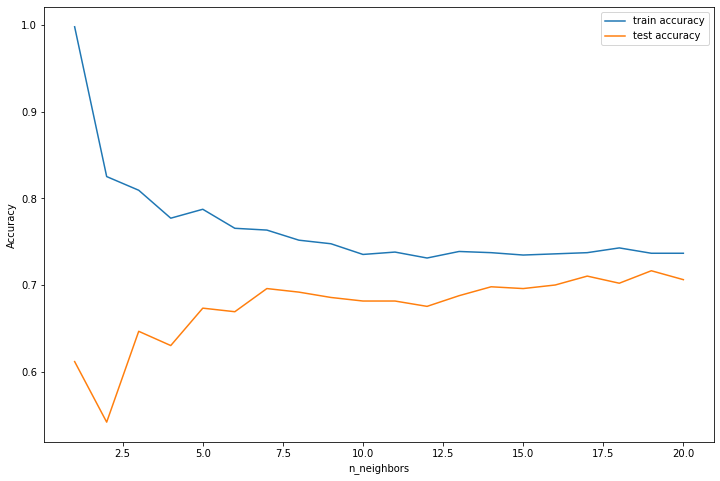

The optimal number of neighbors is: 19


In [28]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = chef_data,
                                  y_data        = chef_target,
                                  response_type = 'class')

In [29]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            chef_target,
            random_state = 219,
            test_size = 0.25,
            stratify = chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7238
Testing  ACCURACY: 0.7269
AUC Score        : 0.6262


In [30]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 52
False Positives: 104
False Negatives: 32
True Positives : 299



In [31]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [32]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7272
Testing  ACCURACY: 0.729
AUC Score        : 0.6261


/Users/saipruthvi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
#C_space          = pd.np.arange(0.1, 5.0, 0.1)
#warm_start_space = [True, False]
#solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
#param_grid = {'C'          : C_space,
#              'warm_start' : warm_start_space,
#              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression(random_state = 219,
#                              max_iter     = 1000)


# GridSearchCV object
#lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                 param_distributions = param_grid, # parameters to tune
#                                 cv                  = 3,          # how many folds in cross-validation
#                                 n_iter              = 250,        # number of combinations of hyperparameters to try
#                                 random_state        = 219,        # starting point for random sequence
#                                 scoring = make_scorer(
#                                           roc_auc_score,
#                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv.fit(chef_data, chef_target)


# printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))



##############################################################################
# The output for the above following code will be:
#
# Tuned Parameters  : {'warm_start': False, 'solver': 'newton-cg', 'C': 1.0}
# Tuned CV AUC      : 0.6357
##############################################################################

In [34]:
# checking the best estimator for the model
#lr_tuned_cv.best_estimator_


##############################################################################
# The output for the above following code will be:
#
# LogisticRegression(max_iter=1000, random_state=219, solver='newton-cg')
##############################################################################

In [35]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned = LogisticRegression(random_state = 219, 
                                         max_iter     = 1000, solver = 'newton-cg')


# FIT step is not needed
lr_tuned.fit(chef_data, chef_target)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.732
LR Tuned Testing  ACCURACY: 0.7351
LR Tuned AUC Score        : 0.6323


In [36]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 54
False Positives: 102
False Negatives: 27
True Positives : 304



In [37]:
# loading model performance
#model_performance = pd.read_excel('./model_results/classification_model_performance.xlsx')


# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6261,0.7272,0.7290,"(53, 103, 29, 302)"
1,Full Tree,0.5731,0.9966,0.6201,"(69, 87, 98, 233)"
2,Pruned Tree,0.6183,0.7293,0.7207,"(52, 104, 32, 299)"
3,Tuned LR,0.6323,0.7320,0.7351,"(54, 102, 27, 304)"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Hyperparameter Tuning on Classification Trees</h2><br>

In [38]:
# declaring a hyperparameter space
#criterion_space = ['gini', 'entropy']
#splitter_space  = ['best', 'random']
#depth_space     = pd.np.arange(1, 25, 1)
#leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_space,
#              'splitter'         : splitter_space,
#              'max_depth'        : depth_space,
#              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
#tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
#                                   param_distributions   = param_grid,
#                                   cv                    = 3,
#                                   n_iter                = 1000,
#                                   random_state          = 219,
#                                   scoring = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))


##############################################################################
# The output for the above following code will be:
#
# Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 12, 'max_depth': 7, 'criterion': 'gini'}
# Tuned Training AUC: 0.6359
##############################################################################

In [39]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(random_state = 219, min_samples_leaf = 12,
                                    max_depth = 7, criterion = 'gini', 
                                    splitter = 'random')

# FIT step is not needed
tree_tuned.fit(chef_data, chef_target)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7293
Testing  ACCURACY: 0.7351
AUC Score        : 0.6425


In [40]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 60
False Positives: 96
False Negatives: 33
True Positives : 298



In [41]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6261,0.7272,0.7290,"(53, 103, 29, 302)"
1,Full Tree,0.5731,0.9966,0.6201,"(69, 87, 98, 233)"
2,Pruned Tree,0.6183,0.7293,0.7207,"(52, 104, 32, 299)"
3,Tuned LR,0.6323,0.7320,0.7351,"(54, 102, 27, 304)"
4,Tuned Tree,0.6425,0.7293,0.7351,"(60, 96, 33, 298)"


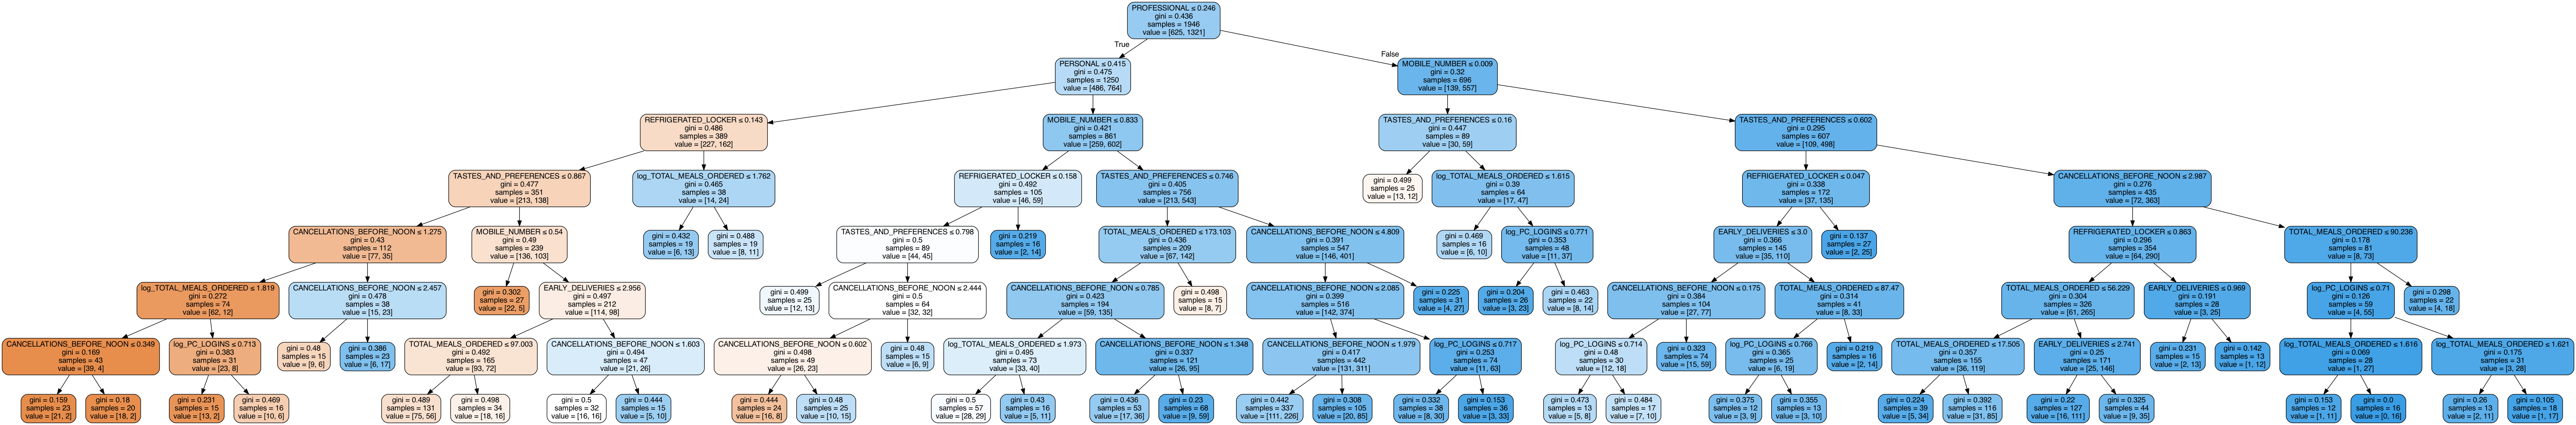

In [42]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = chef_data,
             height = 1500,
             width  = 1500)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Random Forest Model</h2><br>

In [43]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    

In [44]:
# train/test split with the logit_sig variables
chef_data   =  chef.loc[ : , candidate_dict['logit_full']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

In [45]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [46]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.7064
AUC Score        : 0.5874


In [47]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 40
False Positives: 116
False Negatives: 27
True Positives : 304



In [48]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (SIG)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6261,0.7272,0.7290,"(53, 103, 29, 302)"
1,Full Tree,0.5731,0.9966,0.6201,"(69, 87, 98, 233)"
2,Pruned Tree,0.6183,0.7293,0.7207,"(52, 104, 32, 299)"
3,Tuned LR,0.6323,0.7320,0.7351,"(54, 102, 27, 304)"
4,Tuned Tree,0.6425,0.7293,0.7351,"(60, 96, 33, 298)"
5,Random Forest (SIG),0.5874,1.0000,0.7064,"(40, 116, 27, 304)"


In [49]:
# FITTING the training data
#rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
#rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
#estimator_space  = pd.np.arange(100, 1100, 250)
#leaf_space       = pd.np.arange(1, 31, 10)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_space,
#              'min_samples_leaf' : leaf_space,
#              'criterion'        : criterion_space,
#              'bootstrap'        : bootstrap_space,
#              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                               param_distributions = param_grid,
#                               cv         = 3,
#                               n_iter     = 1000,
#                               scoring    = make_scorer(roc_auc_score,
#                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))


##############################################################################
# The output for the above following code will be:
#
# Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 1, 
#                      'criterion': 'entropy', 'bootstrap': False}
# Tuned Training AUC: 0.5837
##############################################################################


In [50]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_


##############################################################################
# The output for the above following code will be:
#
# RandomForestClassifier(bootstrap=False, min_samples_leaf=11, n_estimators=850,
#                        random_state=219, warm_start=True)
##############################################################################

In [51]:
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=850,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(chef_data, chef_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)

# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8444
Forest Tuned Testing  ACCURACY: 0.8522
Forest Tuned AUC Score        : 0.7743


<ipython-input-43-43d1325f8889>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


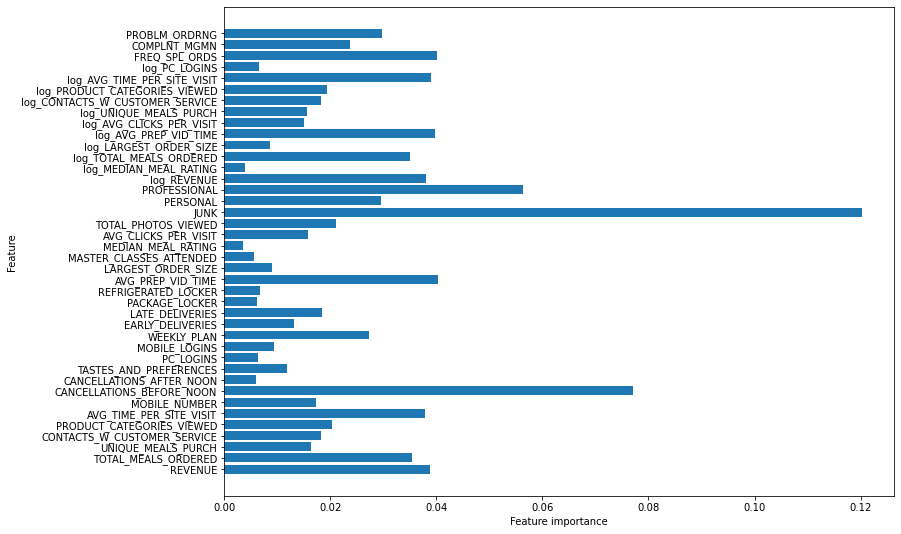

In [52]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [53]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 87
False Positives: 69
False Negatives: 3
True Positives : 328



In [54]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (SIG)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6261,0.7272,0.7290,"(53, 103, 29, 302)"
1,Full Tree,0.5731,0.9966,0.6201,"(69, 87, 98, 233)"
2,Pruned Tree,0.6183,0.7293,0.7207,"(52, 104, 32, 299)"
3,Tuned LR,0.6323,0.7320,0.7351,"(54, 102, 27, 304)"
4,Tuned Tree,0.6425,0.7293,0.7351,"(60, 96, 33, 298)"
5,Random Forest (SIG),0.5874,1.0000,0.7064,"(40, 116, 27, 304)"
6,Tuned Random Forest (SIG),0.7743,0.8444,0.8522,"(87, 69, 3, 328)"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Overall Model Performance</h2><br>

In [55]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
6,Tuned Random Forest (SIG),0.7743,0.8444,0.8522,"(87, 69, 3, 328)"
4,Tuned Tree,0.6425,0.7293,0.7351,"(60, 96, 33, 298)"
3,Tuned LR,0.6323,0.7320,0.7351,"(54, 102, 27, 304)"
0,Logistic,0.6261,0.7272,0.7290,"(53, 103, 29, 302)"
2,Pruned Tree,0.6183,0.7293,0.7207,"(52, 104, 32, 299)"
5,Random Forest (SIG),0.5874,1.0000,0.7064,"(40, 116, 27, 304)"
1,Full Tree,0.5731,0.9966,0.6201,"(69, 87, 98, 233)"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>SUMMARY</h2><br>
After analyzing the data and building an appropriate Machine Learning model that would predict cross-sell success, the Tuned Random Forest model has the highest AUC(Area under the curve) score. Although the Logistic model has the least train-test gap, its AUC score is the least amongst the models used for this dataset. Hence, we will not be considering the Logistic model as our primary model. Finally,<strong> Tuned Random Forest model is the ideal fit</strong> to to predict cross-sell success.

<br><br>
<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /> 


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

~~~


   __          _          __   __           _       _   
  /__\ __   __| |   ___  / _| / _\ ___ _ __(_)_ __ | |_ 
 /_\| '_ \ / _` |  / _ \| |_  \ \ / __| '__| | '_ \| __|
//__| | | | (_| | | (_) |  _| _\ \ (__| |  | | |_) | |_ 
\__/|_| |_|\__,_|  \___/|_|   \__/\___|_|  |_| .__/ \__|
                                             |_|        
   ___                _                        _      _ 
  / _ \_ __ ___  __ _| |_  __      _____  _ __| | __ / \
 / /_\/ '__/ _ \/ _` | __| \ \ /\ / / _ \| '__| |/ //  /
/ /_\\| | |  __/ (_| | |_   \ V  V / (_) | |  |   </\_/ 
\____/|_|  \___|\__,_|\__|   \_/\_/ \___/|_|  |_|\_\/   
                                                        



~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /> <br>